# **Lecture5 homework: wind turbulence statistics**

Name: 姚昭杨

Stuent ID: 24S054017

## **Question**

There are two sets of spatial (vertical z and transverse y) wind velocity time history records, with a duration of 10 minutes and a sampling frequency of 100 Hz (i.e., a time interval of 0.01 s). The data are stored in the windData folder.

### 1 Measurement point coordinates

(1) Z-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 0 | 0 | 0 | 0 |
| z(m) | 10 | 30 | 50 | 70 | 90 |

(2) Y-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 20 | 40 | 60 | 80 |
| z(m) | 50 | 50 | 50 | 50 | 50 |

### 2 Target turbulence characteristics
(1) Mean velocity profile
\begin{gather}
U_{avg}(z) = U_r \left(\frac{z}{z_r}\right)^\alpha \\
U_r=50\, \text{m/s},\ z_r=160\, \text{m},\ \alpha=0.22
\end{gather}

(2) Turbulence intensity profiles
\begin{gather}
I_u(z)=I_{10}\left ( \frac{z}{10}  \right )^{-\alpha}, \ I_v(z)=0.78I_u(z), \ I_w(z)=0.55I_u(z) \\
I_{10}=0.23,\alpha=0.22
\end{gather}

(3) Turbulence integral scale profiles
\begin{gather}
L_u^x(z)=100\left ( \frac{z}{30}  \right )^{0.5}, \ L_v^x(z)=0.5L_u^x(z), \ L_w^x(z)=0.5L_u^x(z) \\
\end{gather}

(4) Von Kármán wind spectra
\begin{gather}
S_u(f)=\frac{4(I_u U_{avg})^2(L_u^x/U_{avg})}{\left [ 1+70.8(fL_u^x/U_{avg})^2 \right ]^{5/6}} \\
S_v(f)=\frac{4(I_v U_{avg})^2(L_v^x/U_{avg})(1+188.4(2fL_v^x/U_{avg})^2)}{\left [ 1+70.8(2fL_v^x/U_{avg})^2 \right ]^{11/6}}  \\
S_w(f)=\frac{4(I_w U_{avg})^2(L_w^x/U_{avg})(1+188.4(2fL_w^x/U_{avg})^2)}{\left [ 1+70.8(2fL_w^x/U_{avg})^2 \right ]^{11/6}} 
\end{gather}

(5) Spatial correlation coefficient in the y-direction proposed by Shiotani  
\begin{gather}
\rho_u^y(r)=e^{-\left | r \right | /L_u^y} \\
\rho_v^y(r)=e^{-\left | r \right | /L_v^y} \\
\rho_w^y(r)=e^{-\left | r \right | /L_w^y} \\
L_u^y=60m,\ L_v^y=50m,\ L_w^y=40m
\end{gather}

### 3 Assignment requirements
Read the wind data in the `windData` folder according to the requirements below, calculate the turbulence characteristics, and plot them (the given target turbulence characteristics should be plotted together).

#### **For the z-direction wind velocity time history, calculate:**

(1) Mean velocity profile (calculate the U-component of velocity)

(2) Turbulence intensity profiles (calculate the fluctuating velocity components u, v, and w)

(3) Wind power spectral density (select one point and calculate the fluctuating velocity components u, v, and w)

(4) Probability density curve (select one point, calculate the fluctuating velocity components u, v, and w, and plot the corresponding normal distribution curve)

#### **For the y-direction wind velocity time history, calculate:**

(1) Spatial correlation coefficient in the y-direction (using the first point as the reference point, calculate the fluctuating velocity components u, v, and w)


## **Answer**

### 1 Statistical results of the z-direction wind velocity time history

In [1]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 1.1 Mean velocity profile

[数据维度验证]
U shape: (60001, 5)
Z shape: (5,)

[绘图前验证]
Measured U shape: (5,)
Z shape: (5,)


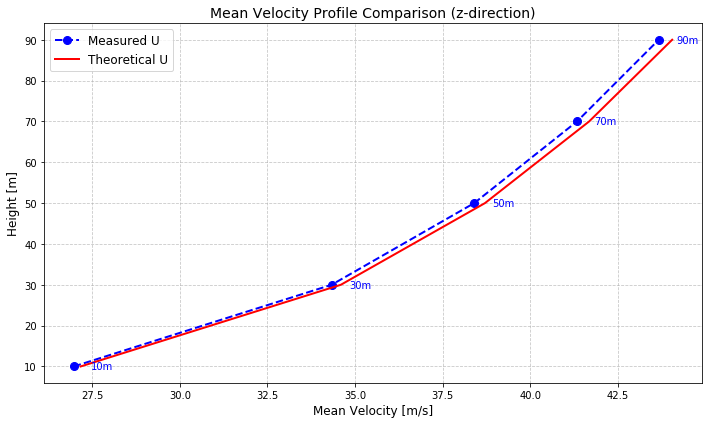

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# ------------------------- 数据加载 -------------------------
simDataPath = 'D:/研一/风工程/2025homework-main/2025homework-main/Lecture5-WindTurbulenceStatistics/windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)

# 获取数据后立即验证维度
U = simData['U'].T if simData['U'].shape[0] == 5 else simData['U']  # 关键修正：转置维度
Z = simData['Z']
dt = simData['dt']
del simData

# 打印验证维度
print("[数据维度验证]")
print("U shape:", U.shape)  # 应为 (时间点数, 测量点数)
print("Z shape:", Z.shape)  # 应为 (测量点数,)

# ------------------------- 参数设置 -------------------------
Ur = 50.0     # 参考风速 [m/s]
zr = 160.0    # 参考高度 [m]
alpha = 0.22  # 幂律指数

# ------------------------- 计算实测平均速度 -------------------------
U_avg_measured = np.mean(U, axis=0)  # 现在应该得到 (测量点数,) 的数组

# ------------------------- 计算理论平均速度 -------------------------
U_avg_theoretical = Ur * (Z/zr)**alpha

# ------------------------- 可视化对比 -------------------------
plt.figure(figsize=(10, 6))

# 确保维度一致
print("\n[绘图前验证]")
print("Measured U shape:", U_avg_measured.shape)
print("Z shape:", Z.shape)

plt.plot(U_avg_measured, Z, 'bo--', linewidth=2, markersize=8, label='Measured U')
plt.plot(U_avg_theoretical, Z, 'r-', linewidth=2, label='Theoretical U')

# 图表修饰
plt.xlabel('Mean Velocity [m/s]', fontsize=12)
plt.ylabel('Height [m]', fontsize=12)
plt.title('Mean Velocity Profile Comparison (z-direction)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# 显示高度标注
for z, u_meas in zip(Z, U_avg_measured):
    plt.text(u_meas+0.5, z, f'{int(z)}m', va='center', color='blue')

plt.tight_layout()
plt.show()

#### 1.2 Turbulence intensity profile

[数据维度验证]
U shape: (60001, 5)
V shape: (60001, 5)
W shape: (60001, 5)
Z shape: (5,)


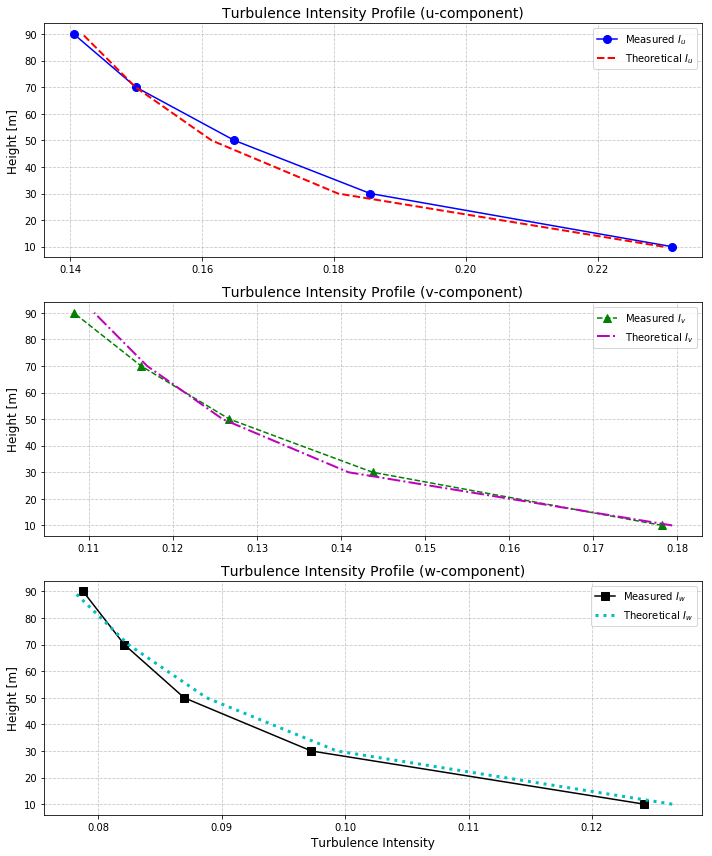

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# ------------------------- 数据加载与维度处理 -------------------------
simDataPath = 'D:/研一/风工程/2025homework-main/2025homework-main/Lecture5-WindTurbulenceStatistics/windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)

# 确保数据维度为 (时间点数, 测量点数)
def adjust_dim(data):
    return data.T if data.shape[0] == 5 else data  # 假设有5个测量点

U = adjust_dim(simData['U'])
V = adjust_dim(simData['V'])
W = adjust_dim(simData['W'])
Z = simData['Z']
dt = simData['dt']
del simData

# 打印验证维度
print("[数据维度验证]")
print("U shape:", U.shape)
print("V shape:", V.shape)
print("W shape:", W.shape)
print("Z shape:", Z.shape)

# ------------------------- 参数设置 -------------------------
I10 = 0.23    # 10米高度湍流强度
alpha = 0.22  # 幂律指数
Ur = 50.0     # 参考风速 (用于理论公式)

# ------------------------- 核心计算 -------------------------
# 计算各分量平均速度
U_avg = np.mean(U, axis=0)
V_avg = np.mean(V, axis=0)
W_avg = np.mean(W, axis=0)

# 计算脉动速度分量
u_prime = U - U_avg
v_prime = V - V_avg
w_prime = W - W_avg

# 计算标准差 (样本标准差ddof=1)
sigma_u = np.std(u_prime, axis=0, ddof=1)
sigma_v = np.std(v_prime, axis=0, ddof=1)
sigma_w = np.std(w_prime, axis=0, ddof=1)

# 计算湍流强度 (全部基于U方向平均速度)
Iu_measured = sigma_u / U_avg
Iv_measured = sigma_v / U_avg
Iw_measured = sigma_w / U_avg

# 理论值计算
Iu_theoretical = I10 * (Z/10)**(-alpha)
Iv_theoretical = 0.78 * Iu_theoretical
Iw_theoretical = 0.55 * Iu_theoretical

# ------------------------- 数据排序 -------------------------
sort_idx = np.argsort(Z)  # 按高度升序排列
Z = Z[sort_idx]
Iu_measured = Iu_measured[sort_idx]
Iv_measured = Iv_measured[sort_idx]
Iw_measured = Iw_measured[sort_idx]
Iu_theoretical = Iu_theoretical[sort_idx]
Iv_theoretical = Iv_theoretical[sort_idx]
Iw_theoretical = Iw_theoretical[sort_idx]

# ------------------------- 可视化 -------------------------
plt.figure(figsize=(10, 12))

# u分量湍流强度
plt.subplot(311)
plt.plot(Iu_measured, Z, 'bo-', markersize=8, label='Measured $I_u$')
plt.plot(Iu_theoretical, Z, 'r--', linewidth=2, label='Theoretical $I_u$')
plt.ylabel('Height [m]', fontsize=12)
plt.title('Turbulence Intensity Profile (u-component)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# v分量湍流强度
plt.subplot(312)
plt.plot(Iv_measured, Z, 'g^--', markersize=8, label='Measured $I_v$')
plt.plot(Iv_theoretical, Z, 'm-.', linewidth=2, label='Theoretical $I_v$')
plt.ylabel('Height [m]', fontsize=12)
plt.title('Turbulence Intensity Profile (v-component)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# w分量湍流强度
plt.subplot(313)
plt.plot(Iw_measured, Z, 'ks-', markersize=8, label='Measured $I_w$')
plt.plot(Iw_theoretical, Z, 'c:', linewidth=3, label='Theoretical $I_w$')
plt.xlabel('Turbulence Intensity', fontsize=12)
plt.ylabel('Height [m]', fontsize=12)
plt.title('Turbulence Intensity Profile (w-component)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

#### 1.3 Wind power spectral density

找到高度50m的测点索引：2


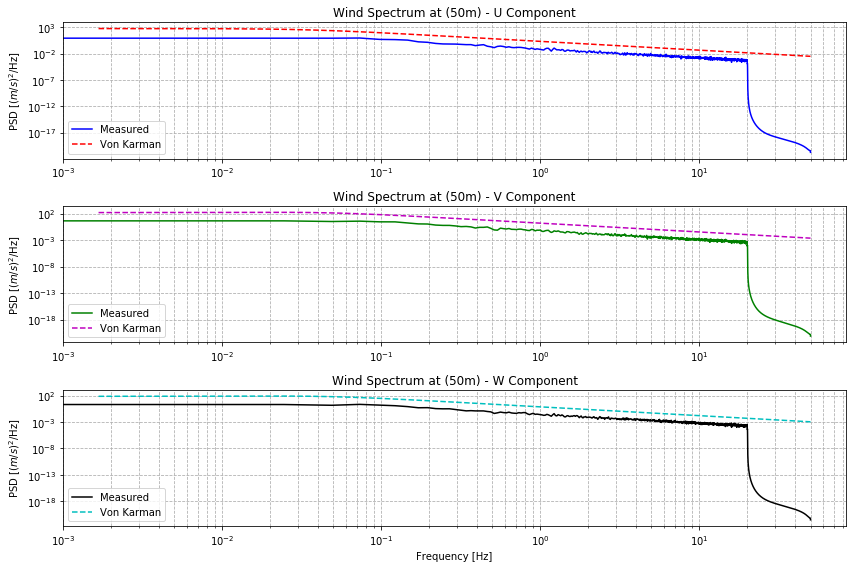

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as sio

# ------------------------- 数据加载与预处理 -------------------------
simDataPath = 'D:/研一/风工程/2025homework-main/2025homework-main/Lecture5-WindTurbulenceStatistics/windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)

# 自动处理数据维度
def adjust_dim(data):
    return data.T if data.shape[0] == 5 else data  # 假设有5个测量点

U = adjust_dim(simData['U'])
V = adjust_dim(simData['V'])
W = adjust_dim(simData['W'])
Z = simData['Z']
dt = simData['dt']
del simData

# 查找50米高度对应的索引
target_height = 50
point_idx = np.where(Z == target_height)[0][0]
print(f"找到高度{target_height}m的测点索引：{point_idx}")

# ------------------------- 参数计算 -------------------------
# 时域参数
fs = 1/dt                  # 采样频率 (Hz)
T = U.shape[0] * dt        # 总时长 (s)
N = U.shape[0]             # 数据点数

# 目标点数据提取
u_ts = U[:, point_idx]     # U分量时间序列
v_ts = V[:, point_idx]     # V分量时间序列
w_ts = W[:, point_idx]     # W分量时间序列

# 基本参数计算
U_avg = np.mean(u_ts)      # 平均风速
Iu = np.std(u_ts)/U_avg    # 湍流强度
Iv = np.std(v_ts)/U_avg
Iw = np.std(w_ts)/U_avg

# 积分尺度计算 (z=50m)
z = target_height
Lux = 100 * (z/30)**0.5    # u分量积分尺度
Lvx = 0.5 * Lux            # v分量积分尺度
Lwx = 0.5 * Lux            # w分量积分尺度

# ------------------------- 功率谱计算 -------------------------
# 频率向量
f = np.fft.rfftfreq(N, d=dt)[1:]  # 排除0频率

# 使用Welch方法计算实测PSD
nperseg = 4096  # 分段长度
f_meas, Su_meas = signal.welch(u_ts, fs=fs, nperseg=nperseg, scaling='spectrum')
_, Sv_meas = signal.welch(v_ts, fs=fs, nperseg=nperseg, scaling='spectrum')
_, Sw_meas = signal.welch(w_ts, fs=fs, nperseg=nperseg, scaling='spectrum')

# 冯·卡门谱公式定义
def von_karman_u(f, U_avg, Iu, Lux):
    numerator = 4 * (Iu*U_avg)**2 * (Lux/U_avg)
    denominator = (1 + 70.8 * (f * Lux/U_avg)**2 )**(5/6)
    return numerator / denominator

def von_karman_vw(f, U_avg, I, Lx):
    term = 2*f*Lx/U_avg
    numerator = 4 * (I*U_avg)**2 * (Lx/U_avg) * (1 + 188.4*term**2)
    denominator = (1 + 70.8*term**2)**(11/6)
    return numerator / denominator

# 理论谱计算
Su_theory = von_karman_u(f, U_avg, Iu, Lux)
Sv_theory = von_karman_vw(f, U_avg, Iv, Lvx)
Sw_theory = von_karman_vw(f, U_avg, Iw, Lwx)

# ------------------------- 可视化 -------------------------
plt.figure(figsize=(12, 8))

# U分量谱
plt.subplot(311)
plt.loglog(f_meas, Su_meas, 'b-', label='Measured')
plt.loglog(f, Su_theory, 'r--', label='Von Karman')
plt.title(f'Wind Spectrum at ({target_height}m) - U Component')
plt.ylabel('PSD [($m/s$)$^2$/Hz]')
plt.grid(True, which='both', ls='--')
plt.legend()

# V分量谱
plt.subplot(312)
plt.loglog(f_meas, Sv_meas, 'g-', label='Measured')
plt.loglog(f, Sv_theory, 'm--', label='Von Karman')
plt.title(f'Wind Spectrum at ({target_height}m) - V Component')
plt.ylabel('PSD [($m/s$)$^2$/Hz]')
plt.grid(True, which='both', ls='--')
plt.legend()

# W分量谱
plt.subplot(313)
plt.loglog(f_meas, Sw_meas, 'k-', label='Measured')
plt.loglog(f, Sw_theory, 'c--', label='Von Karman')
plt.title(f'Wind Spectrum at ({target_height}m) - W Component')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [($m/s$)$^2$/Hz]')
plt.grid(True, which='both', ls='--')
plt.legend()

plt.tight_layout()
plt.show()

#### 1.4 Probability density curve

找到高度50m的测点索引：2


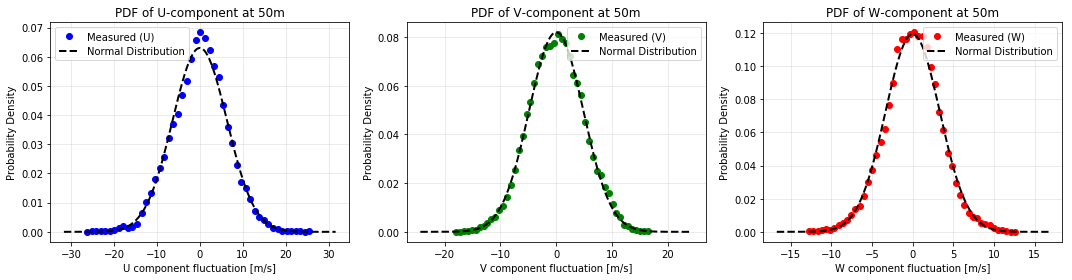

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.io as sio

# ------------------------- 数据加载与预处理 -------------------------
simDataPath = 'D:/研一/风工程/2025homework-main/2025homework-main/Lecture5-WindTurbulenceStatistics/windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)

def adjust_dim(data):
    return data.T if data.shape[0] == 5 else data  # 根据测量点数调整

U = adjust_dim(simData['U'])
V = adjust_dim(simData['V'])
W = adjust_dim(simData['W'])
Z = simData['Z']
dt = simData['dt']
del simData

# 查找50米高度索引
target_z = 50
point_idx = np.where(Z == target_z)[0][0]
print(f"找到高度{target_z}m的测点索引：{point_idx}")

# ------------------------- 脉动速度计算 -------------------------
# 计算平均速度
U_avg = np.mean(U[:, point_idx])
V_avg = np.mean(V[:, point_idx])
W_avg = np.mean(W[:, point_idx])

# 计算脉动分量
u_prime = U[:, point_idx] - U_avg
v_prime = V[:, point_idx] - V_avg
w_prime = W[:, point_idx] - W_avg

# ------------------------- 概率密度计算 -------------------------
def plot_pdf_component(data, component, color):
    # 计算统计参数
    mu = 0  # 脉动速度均值为0
    sigma = np.std(data)
    
    # 生成理论正态分布
    x = np.linspace(-5*sigma, 5*sigma, 300)
    pdf_normal = stats.norm.pdf(x, mu, sigma)
    
    # 计算数据直方图
    hist, bin_edges = np.histogram(data, bins=50, density=True)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    
    # 绘图
    plt.plot(bin_centers, hist, 'o', color=color, markersize=6, 
             label=f'Measured ({component})')
    plt.plot(x, pdf_normal, '--', color='k', linewidth=2, 
             label='Normal Distribution')
    plt.xlabel(f'{component} component fluctuation [m/s]')
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {component}-component at {target_z}m')
    plt.legend()
    plt.grid(True, alpha=0.3)

# ------------------------- 可视化 -------------------------
plt.figure(figsize=(15, 4))

# U分量概率密度
plt.subplot(131)
plot_pdf_component(u_prime, 'U', 'b')

# V分量概率密度
plt.subplot(132)
plot_pdf_component(v_prime, 'V', 'g')

# W分量概率密度
plt.subplot(133)
plot_pdf_component(w_prime, 'W', 'r')

plt.tight_layout()
plt.show()

### 2 Statistical results of the y-direction wind velocity time history

#### 2.1 Spatial correlation coefficient in y direction

Y shape: (5,)
Z shape: (5,)
参考点(y=0m, z=50m)索引：0


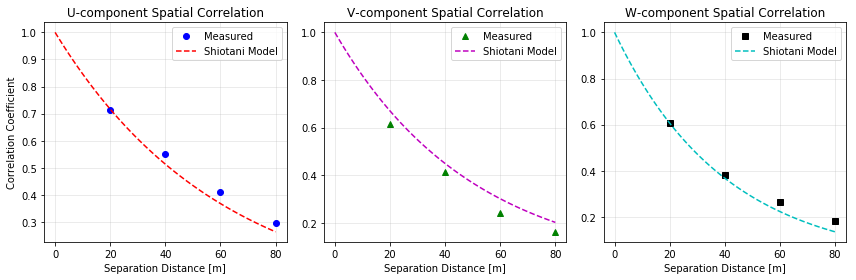

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# ------------------------- 数据加载与预处理 -------------------------
simDataPath = 'D:/研一/风工程/2025homework-main/2025homework-main/Lecture5-WindTurbulenceStatistics/windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)

# 自动处理数据维度
def adjust_dim(data):
    return data.T if data.shape[0] == 5 else data  # 假设有5个测量点

U = adjust_dim(simData['U'])
V = adjust_dim(simData['V'])
W = adjust_dim(simData['W'])
Y = simData['Y'].flatten()  # 确保Y为一维数组
Z = simData['Z'].flatten()  # 确保Z为一维数组
dt = simData['dt']
del simData

# 打印验证维度
print("Y shape:", Y.shape)  # 预期输出：(5,)
print("Z shape:", Z.shape)  # 预期输出：(5,)

# ------------------------- 查找参考点 -------------------------
ref_y = 0    # 参考点y坐标
ref_z = 50   # 参考点z坐标
ref_idx = np.where((Y == ref_y) & (Z == ref_z))[0][0]
print(f"参考点(y={ref_y}m, z={ref_z}m)索引：{ref_idx}")

# 提取各测点y坐标
y_coords = Y  # 直接使用一维数组

# ------------------------- 脉动速度计算 -------------------------
def calc_fluctuations(vel):
    return vel - np.mean(vel, axis=0)

u_prime = calc_fluctuations(U)
v_prime = calc_fluctuations(V)
w_prime = calc_fluctuations(W)

# ------------------------- 空间相关系数计算 -------------------------
def spatial_correlation(ref_idx, prime_data, y_coords):
    ref_series = prime_data[:, ref_idx]
    corr_coeffs = []
    distances = []
    
    for i in range(prime_data.shape[1]):
        if i == ref_idx:
            continue
        target_series = prime_data[:, i]
        corr = np.corrcoef(ref_series, target_series)[0, 1]
        corr_coeffs.append(corr)
        distances.append(abs(y_coords[i] - y_coords[ref_idx]))
    
    return np.array(distances), np.array(corr_coeffs)

# 计算各分量相关系数
dist_u, rho_u = spatial_correlation(ref_idx, u_prime, y_coords)
dist_v, rho_v = spatial_correlation(ref_idx, v_prime, y_coords)
dist_w, rho_w = spatial_correlation(ref_idx, w_prime, y_coords)

# ------------------------- 理论模型 -------------------------
def shiotani_model(r, Ly):
    return np.exp(-np.abs(r)/Ly)

# 理论参数
Ly_u = 60  # u分量积分尺度
Ly_v = 50  # v分量积分尺度
Ly_w = 40  # w分量积分尺度

# 生成理论曲线
r = np.linspace(0, max(y_coords), 100)
rho_u_theory = shiotani_model(r, Ly_u)
rho_v_theory = shiotani_model(r, Ly_v)
rho_w_theory = shiotani_model(r, Ly_w)

# ------------------------- 可视化 -------------------------
plt.figure(figsize=(12, 4))

# u分量相关系数
plt.subplot(131)
plt.plot(dist_u, rho_u, 'bo', label='Measured')
plt.plot(r, rho_u_theory, 'r--', label='Shiotani Model')
plt.xlabel('Separation Distance [m]')
plt.ylabel('Correlation Coefficient')
plt.title('U-component Spatial Correlation')
plt.grid(True, alpha=0.3)
plt.legend()

# v分量相关系数
plt.subplot(132)
plt.plot(dist_v, rho_v, 'g^', label='Measured')
plt.plot(r, rho_v_theory, 'm--', label='Shiotani Model')
plt.xlabel('Separation Distance [m]')
plt.title('V-component Spatial Correlation')
plt.grid(True, alpha=0.3)
plt.legend()

# w分量相关系数
plt.subplot(133)
plt.plot(dist_w, rho_w, 'ks', label='Measured')
plt.plot(r, rho_w_theory, 'c--', label='Shiotani Model')
plt.xlabel('Separation Distance [m]')
plt.title('W-component Spatial Correlation')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()